[{'ticks': 981, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 126993443657, 'pos': [1829.0, 1809.0]}, {'ticks': 981, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 126993443633, 'pos': [185.0, 814.0]}, {'ticks': 982, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 126993443588, 'pos': [962.0, 1822.0]}, {'ticks': 982, 'class': 'EntitySpawn', 'entity_type': 'agent', 'agent_id': 126993443564, 'pos': [2050.0, 2032.0]}, {'ticks': 998, 'class': 'AgentDetection', 'detection_type': 'pickup', 'agent_id': 126993443657, 'detected_id': 126993468642}, {'ticks': 998, 'class': 'AgentDetection', 'detection_type': 'pickup', 'agent_id': 126993443657, 'detected_id': 126993468654}, {'ticks': 999, 'class': 'AgentDetection', 'detection_type': 'vision', 'agent_id': 126993443633, 'detected_id': 126993468486}, {'ticks': 999, 'class': 'AgentDetection', 'detection_type': 'pickup', 'agent_id': 126993443633, 'detected_id': 126993443786}, {'ticks': 999, 'class': 'AgentDetectio

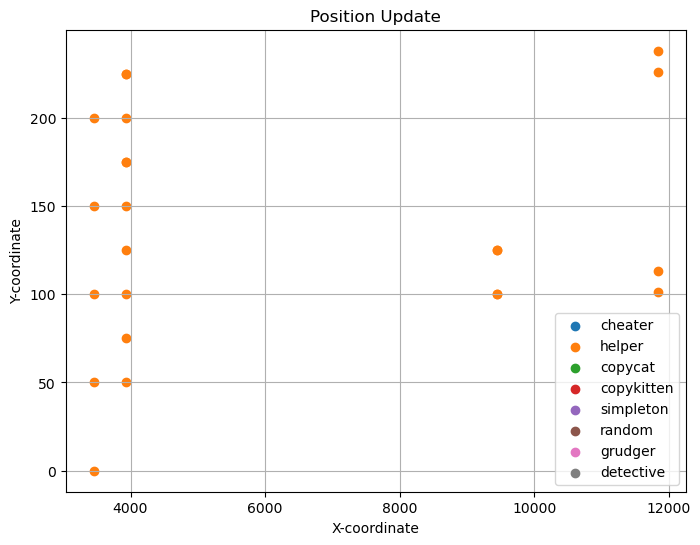

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json


with open('log.json', 'r') as file:
    json_data = json.load(file)


plot_data = []
battle_types = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
print(json_data)
for item in json_data:
    if item["class"] == "AgentHealthUpdate":
        battle_type = item["battle_type"]
        if battle_type in battle_types:
            plot_data.append([item["ticks"], item["health"], battle_type])

plot_data_by_type = {battle_type: [[], []] for battle_type in battle_types}
for data in plot_data:
    x, y, battle_type = data
    plot_data_by_type[battle_type][0].append(x)
    plot_data_by_type[battle_type][1].append(y)


plt.figure(figsize=(8, 6))
for battle_type, data in plot_data_by_type.items():
    x_values, y_values = data
    plt.scatter(x_values, y_values, label=battle_type)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Position Update')
plt.legend()
plt.grid(True)
plt.show()


# for item in range(len(json_data)):
#     if json_data[item]["class"] == "AgentHealthUpdate":
            
#         # for ag in json_data[item]["AgentHealthUpdate"]:
#         json_data[item]["battle_type"] == battle_types[0]
#         plot_data.append([json_data[item]["ticks"], json_data[item]["health"]])

# x_values = [pos[0] for pos in plot_data]
# y_values = [pos[1] for pos in plot_data]

# plt.figure(figsize=(8, 6))
# plt.scatter(x_values, y_values, color='blue', label='Position')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.title('Position Update')
# plt.legend()
# plt.grid(True)
# plt.show()


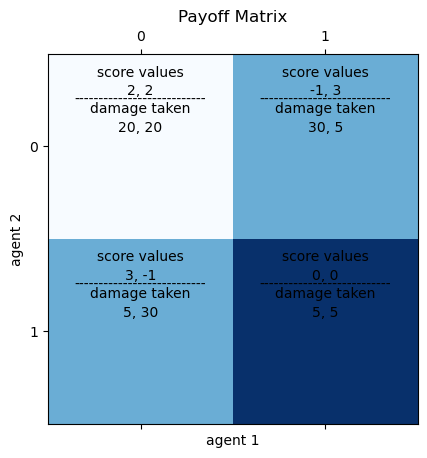

In [2]:
color_matrix = np.array([[1, 2],
                         [2, 3]])

values = np.array([[(2, 2), (-1, 3)],[(3, -1), (0, 0)]])
damage = np.array([[(20, 20), (30, 5)],[(5, 30), (5, 5)]])

fig, ax = plt.subplots()

cax = ax.matshow(color_matrix, cmap=plt.cm.Blues)

plt.xlabel("agent 2 Strategies")
plt.ylabel("agent 1 Strategies")

for i in range(len(values)):
    for j in range(len(values[i])):
        plt.text(j, i-.4, "score values", va='center', ha='center')
        plt.text(j, i-.3, f"{values[i, j][0]}, {values[i, j][1]}", va='center', ha='center')
        plt.text(j, i-.25, f"---------------------------", va='center', ha='center')
        plt.text(j, i-.2, "damage taken", va='center', ha='center')
        plt.text(j, i-.1, f"{damage[i, j][0]}, {damage[i, j][1]}", va='center', ha='center')

plt.title('Payoff Matrix')
plt.xlabel('agent 1')
plt.ylabel('agent 2')
plt.show()